In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [74]:
def simulation_EDO(N,alpha,gamma,lamda,p,dt,temps,i0): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps))
    C = np.zeros((temps))
    D = np.zeros((temps))
    S[0] = N - i0 
    I[0] = i0
    C[0] = 0
    D[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1):  
        S[i+1] = S[i] - (alpha*S[i]*I[i]/N) 
        I[i+1] = I[i] + (alpha*S[i]*I[i]/N) - (p*gamma*I[i]) - ((1-p)*lamda*I[i])
        C[i+1] = C[i] + (p*gamma*I[i])
        D[i+1] = D[i] + ((1-p)*lamda*I[i])
        t[i+1] = t[i] + dt          
        i += 1
    return t,S,I,C,D
t,S,I,C,D = simulation_EDO(N=100,alpha=0.25,gamma=0.07,lamda=0.07,p=0.75,dt=1,temps=100,i0=3)

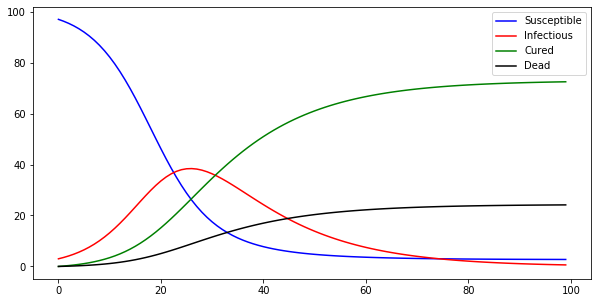

In [75]:
plt.figure(figsize=(10,5))
plt.plot(t,S,color='blue',label="Susceptible")
plt.plot(t,I,color='red',label='Infectious')
plt.plot(t,C,color='green',label='Cured')
plt.plot(t,D,color='black',label='Dead')
plt.legend()

In [105]:
def simulation_continue(N=100,beta=0.25,gamma=0.07,lamda=0.07,p=0.75,dt=0.01,temps=5000,i0=3): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps))
    C = np.zeros((temps))
    D = np.zeros((temps)) 
    S[0] = N - i0 
    I[0] = i0
    C[0] = 0
    D[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1): 
        U1 = np.random.rand() 
        U2 = np.random.rand() 
        U3 = np.random.rand() 
        a=(beta*S[i]*I[i]/N)+(p*(gamma)*I[i])+((1-p)*(lamda))*I[i]
        b=(p*(gamma)*I[i])+((1-p)*(lamda))*I[i]
        probi = ((beta/N)*I[i]*S[i])/a
        probi1 = (p*(gamma)*I[i])/b
        h = 1/a
        t[i+1] = t[i] + h           
        if U2 <= probi: 
            S[i+1] = S[i] - 1  
            I[i+1] = I[i] + 1
            C[i+1] = C[i]
            D[i+1] = D[i]
            
        else:                 
            S[i+1] = S[i]  
            I[i+1] = I[i] - 1
            if U3 <= probi1:
                C[i+1] = C[i] + 1
                D[i+1] = D[i]
            else:
                C[i+1] = C[i] 
                D[i+1] = D[i] + 1
        i += 1
    return t,S,I,C,D
t,S,I,C,D = simulation_continue()

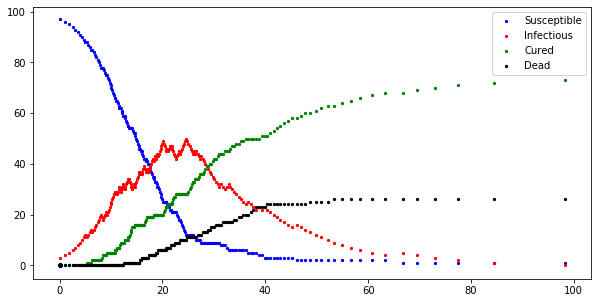

In [109]:
plt.figure(figsize=(10,5))
plt.scatter(t,S,color='blue',s=5,label="Susceptible")
plt.scatter(t,I,color='red',s=5,label='Infectious')
plt.scatter(t,C,color='green',s=5,label='Cured')
plt.scatter(t,D,color='black',s=5,label='Dead')
plt.legend()

In [140]:
def simulation_EDS(N,alpha,gamma,lamda,p,dt,temps,i0): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps))
    C = np.zeros((temps))
    D = np.zeros((temps))
    S[0] = N - i0 
    I[0] = i0
    C[0] = 0
    D[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1):  
        S[i+1] = S[i] - (alpha*S[i]*I[i]/N)*dt + (alpha*S[i]*I[i]/N)*np.random.normal(0,dt) - (alpha*S[i]*I[i]/N)*np.random.normal(0,dt) 
        I[i+1] = I[i] + ((alpha*S[i]*I[i]/N) - (p*gamma*I[i]) - ((1-p)*lamda*I[i]))*dt - (alpha*S[i]*I[i]/N)*np.random.normal(0,dt) + ((alpha*S[i]*I[i]/N) + (p*gamma*I[i]) + ((1-p)*lamda*I[i]))*np.random.normal(0,dt) 
        C[i+1] = C[i] + (p*gamma*I[i])*dt + (p*gamma*I[i])*np.random.normal(0,dt) 
        D[i+1] = D[i] + ((1-p)*lamda*I[i])*dt + ((1-p)*lamda*I[i])*np.random.normal(0,dt)  
        t[i+1] = t[i] + dt          
        i += 1
    return t,S,I,C,D

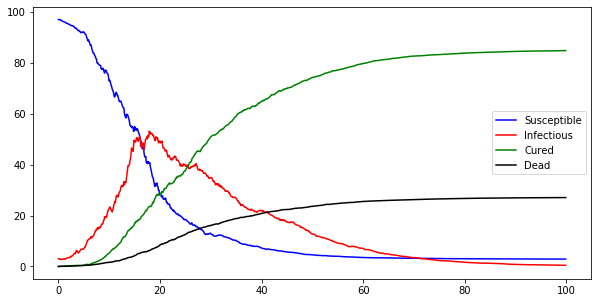

In [145]:
t,S,I,C,D = simulation_EDS(N=100,alpha=0.25,gamma=0.07,lamda=0.07,p=0.75,dt=0.1,temps=1000,i0=3)
plt.figure(figsize=(10,5))
plt.plot(t,S,color='blue',label="Susceptible")
plt.plot(t,I,color='red',label='Infectious')
plt.plot(t,C,color='green',label='Cured')
plt.plot(t,D,color='black',label='Dead')
plt.legend()